In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from glob import glob
import os
from matplotlib.lines import Line2D



In [2]:
path = '/Users/zcaspar/codes/Diagnostics/'

In [3]:
ds = [xr.open_dataset(file) for file in sorted(glob(path+'jet*1000j/'+'ZC__*'))]

In [4]:
number = len(ds)
cmap_Ta = plt.get_cmap('Greys')
cmap_Te = plt.get_cmap('Blues')
cmap_Tl = plt.get_cmap('Reds')
colors_Ta = [cmap_Ta(i) for i in np.linspace(0.5, 1, number)]
colors_Te = [cmap_Te(i) for i in np.linspace(.5, 1, number)]
colors_Tl = [cmap_Tl(i) for i in np.linspace(.5, 1, number)]

Text(0.5, 1.0, '')

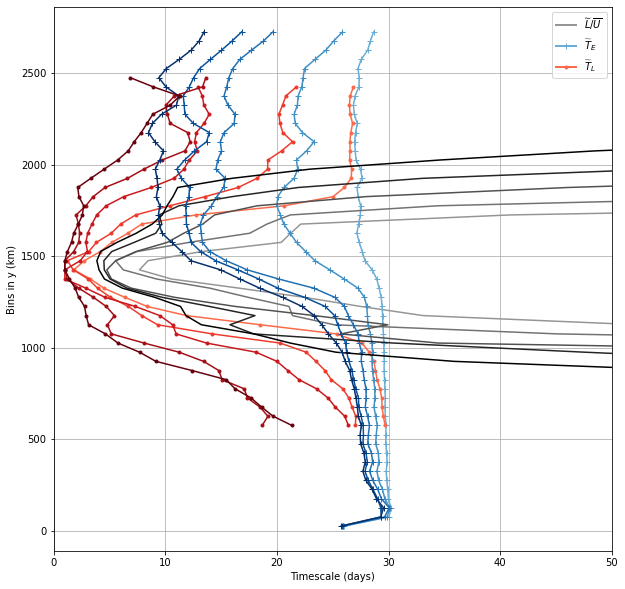

In [5]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=cmap_Ta(0.5), lw=2),
                Line2D([0], [0], color=cmap_Te(.5), lw=2,marker='+'),
                Line2D([0], [0], color=cmap_Tl(.5), lw=2,marker='.')]
fig,ax = plt.subplots(figsize=(10,10))
for i,d in enumerate(ds):
    d['Ta'].plot(ax=ax,y='ybin',c=colors_Ta[i])
    d['E_u_avg'].sel(param='Tt').plot(ax=ax,y='ybin',c=colors_Te[i],marker='+')
    d['L_u_avg'].sel(param='Tt').plot(ax=ax,y='ybin',c=colors_Tl[i],marker='.')
ax.grid();ax.set_xlim(0,50)#;ax.legend()
ax.set_xlabel('Timescale (days)');ax.set_ylabel('Bins in y (km)')
ax.legend(custom_lines, [r'$\widetilde{L}/\overline{U}$', r'$\widetilde{T}_E$', r'$\widetilde{T}_L$'])
ax.set_title('')


(500.0, 2800.0)

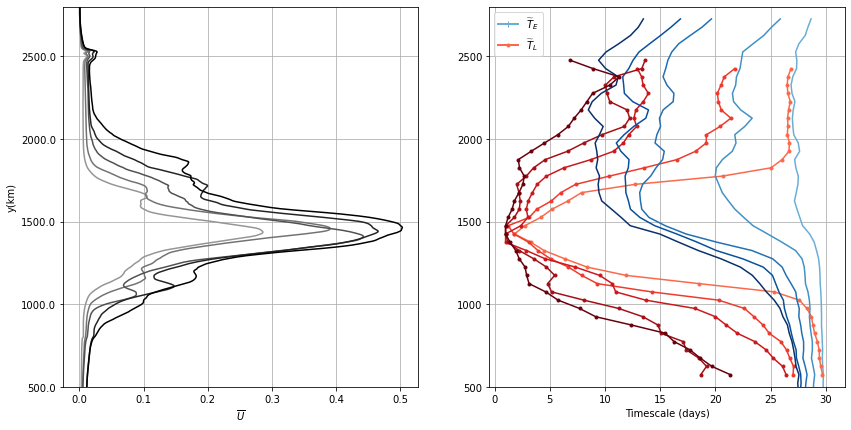

In [6]:
custom_lines = [
                Line2D([0], [0], color=cmap_Te(.5), lw=2,marker='+'),
                Line2D([0], [0], color=cmap_Tl(.5), lw=2,marker='.')]
fig,ax = plt.subplots(1,2,figsize=(14,7))
for i,d in enumerate(ds):
    
    d['Ubar'].plot(ax=ax[0],y='y_rho',c=colors_Ta[i])
    ax[0].set_xlabel(r'$\overline{U}$');ax[0].set_ylabel(r'y(km)')
    ax[0].set_ylim(500*1e3,2800*1e3)
    laby = ax[0].get_yticks();laby = [str(l*1e-3) for l in laby];
    ax[0].set_yticklabels(laby)
    d['E_u_avg'].sel(param='Tt').plot(ax=ax[1],y='ybin',c=colors_Te[i])
    d['L_u_avg'].sel(param='Tt').plot(ax=ax[1],y='ybin',c=colors_Tl[i],marker='.')
ax[0].grid();ax[0].set_title('');ax[1].grid();ax[1].set_title('');ax[1].set_ylabel('')
ax[1].legend(custom_lines, [r'$\widetilde{T}_E$', r'$\widetilde{T}_L$'])
ax[1].set_xlabel('Timescale (days)')
ax[1].set_ylim(500,2800)

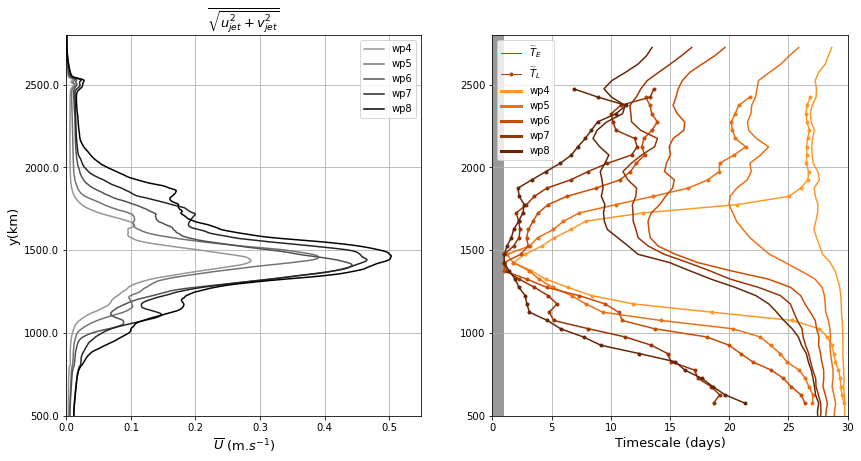

In [7]:
fontsize = 13
number = len(ds)
cmap = plt.get_cmap('YlOrBr')
colors = [cmap(i) for i in np.linspace(0.5, 1, number)]
custom_lines = [
                Line2D([0], [0], color=cmap(.8), lw=1),
                Line2D([0], [0], color=cmap(.8), lw=1,marker='.')
                ]
labels=[r'$\widetilde{T}_E$', r'$\widetilde{T}_L$']
fig,ax = plt.subplots(1,2,figsize=(14,7))
for i,d in enumerate(ds):
    file = sorted(glob(path+'jet*1000j'))[i]
    wp = file[-20:-19]
    d['Ubar'].plot(ax=ax[0],y='y_rho',c=colors_Ta[i],label='wp'+wp)
    ax[0].set_ylim(500*1e3,2800*1e3)
    laby = ax[0].get_yticks();laby = [str(l*1e-3) for l in laby];
    ax[0].set_yticklabels(laby)
    d['E_u_avg'].sel(param='Tt').plot(ax=ax[1],y='ybin',c=colors[i])
    d['L_u_avg'].sel(param='Tt').plot(ax=ax[1],y='ybin',c=colors[i],marker='.')
    custom_lines.append(Line2D([0], [0], color=colors[i], lw=3))
    labels.append('wp'+wp)
ax[0].set_xlabel(r'$\overline{U}$ (m.$s^{-1}$)',fontsize=fontsize);ax[0].set_ylabel(r'y(km)',fontsize=fontsize);
ax[0].set_title(r'$\overline{\sqrt{u_{jet}^2+v_{jet}^2}}$',fontsize=fontsize)
ax[0].grid();ax[1].grid();ax[1].set_title('');ax[1].set_ylabel('')
ax[1].legend(custom_lines, labels)
ax[1].set_xlabel('Timescale (days)',fontsize=fontsize)
ax[1].set_ylim(500,2800);ax[0].legend();ax[0].set_xlim(0,0.55);ax[1].set_xlim(0,30)
ax[1].axvspan(0, 1, facecolor='0.2', alpha=0.5)
plt.savefig('/Users/zcaspar/codes/Figures/Synthesis/Tcomp.pdf')

Text(0.5, 1.0, '')

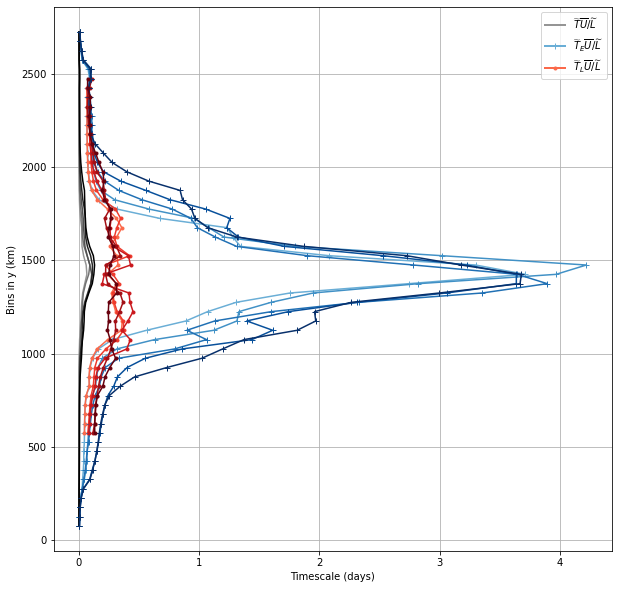

In [8]:
Tw = 0.5
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=cmap_Ta(0.5), lw=2),
                Line2D([0], [0], color=cmap_Te(.5), lw=2,marker='+'),
                Line2D([0], [0], color=cmap_Tl(.5), lw=2,marker='.')]
fig,ax = plt.subplots(figsize=(10,10))
for i,d in enumerate(ds):
    (Tw/d['Ta']).plot(ax=ax,y='ybin',c=colors_Ta[i])
    (d['E_u_avg'].sel(param='Tt')/d['Ta']).plot(ax=ax,y='ybin',c=colors_Te[i],marker='+')
    (d['L_u_avg'].sel(param='Tt')/d['Ta']).plot(ax=ax,y='ybin',c=colors_Tl[i],marker='.')
ax.grid()#;ax.set_xlim(0,50)#;ax.legend()
ax.set_xlabel('Timescale (days)');ax.set_ylabel('Bins in y (km)')
ax.legend(custom_lines, [r'$\widetilde{T}\overline{U}/\widetilde{L}$', r'$\widetilde{T}_E\overline{U}/\widetilde{L}$'
                         , r'$\widetilde{T}_L\overline{U}/\widetilde{L}$'])
ax.set_title('')



Text(0, 0.5, '')

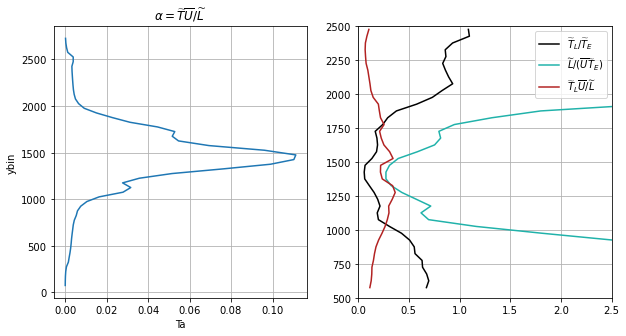

In [9]:
titles = [r'$\alpha = \widetilde{T}\overline{U}/\widetilde{L}$', r'$\widetilde{T}_L/\widetilde{T}_E$'
          , r'$\widetilde{L}/(\overline{U}\widetilde{T}_E)$'
          , r'$\widetilde{T}_L\overline{U}/\widetilde{L}$']
d = ds[-2]
fig,ax = plt.subplots(1,2,figsize=(10,5))
var= [(Tw/d['Ta']),(d['L_u_avg'].sel(param='Tt')/d['E_u_avg'].sel(param='Tt')),
      (d['Ta']/d['E_u_avg'].sel(param='Tt')),(d['L_u_avg'].sel(param='Tt')/d['Ta'])]
var[0].plot(ax=ax[0],y='ybin')
ax[0].grid();ax[0].set_title(titles[0])
for V,title,c in zip(var[1:],titles[1:],['k','lightseagreen','firebrick']):
    V.plot(ax=ax[1],y='ybin',label=title,c=c)
ax[1].grid();ax[1].set_xlim(0,2.5);ax[1].set_ylim(500,2500)
ax[1].legend();ax[1].set_title('');ax[1].set_xlabel('');ax[1].set_ylabel('')

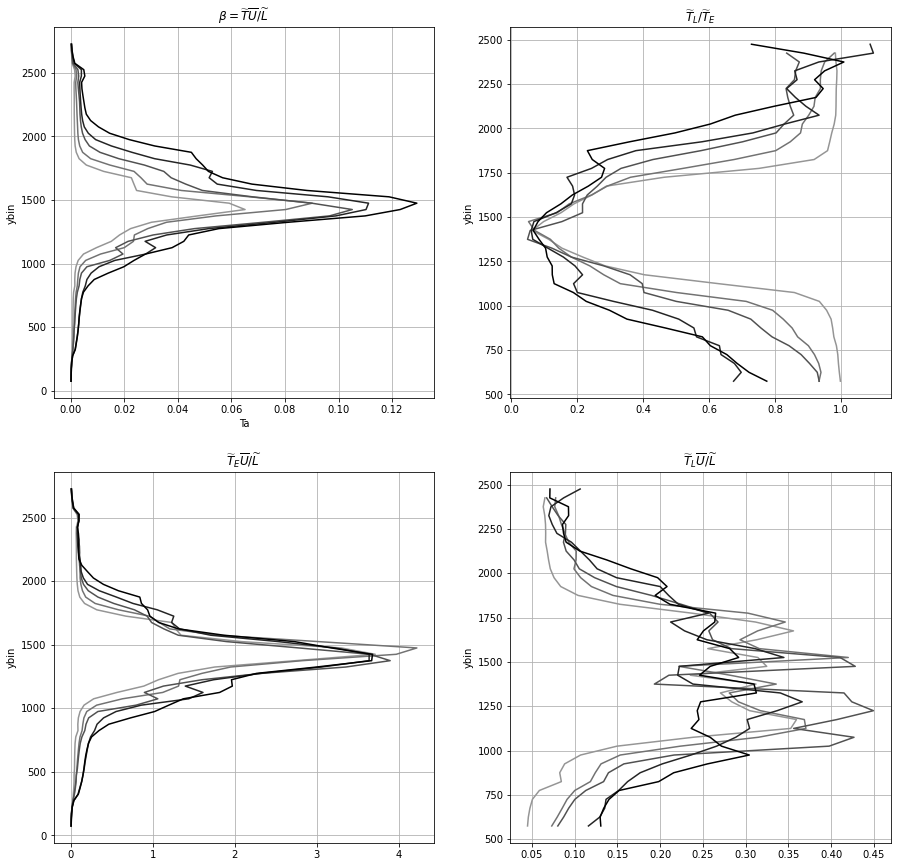

In [10]:
titles = [r'$\beta = \widetilde{T}\overline{U}/\widetilde{L}$', r'$\widetilde{T}_L/\widetilde{T}_E$'
          , r'$\widetilde{T}_E\overline{U}/\widetilde{L}$'
          , r'$\widetilde{T}_L\overline{U}/\widetilde{L}$']

fig,axs = plt.subplots(2,2,figsize=(15,15))
for i,d in enumerate(ds):
    var= [(Tw/d['Ta']),(d['L_u_avg'].sel(param='Tt')/d['E_u_avg'].sel(param='Tt')),
          (d['E_u_avg'].sel(param='Tt')/d['Ta']),(d['L_u_avg'].sel(param='Tt')/d['Ta'])]
    for V,title,ax in zip(var[:-2],titles[:-2],axs[0,:]):
        V.plot(ax=ax,y='ybin',c=colors_Ta[i])
        ax.grid();ax.set_title(title)
    for V,title,ax in zip(var[2:],titles[2:],axs[1,:]):
        V.plot(ax=ax,y='ybin',c=colors_Ta[i])
        ax.grid();ax.set_title(title)


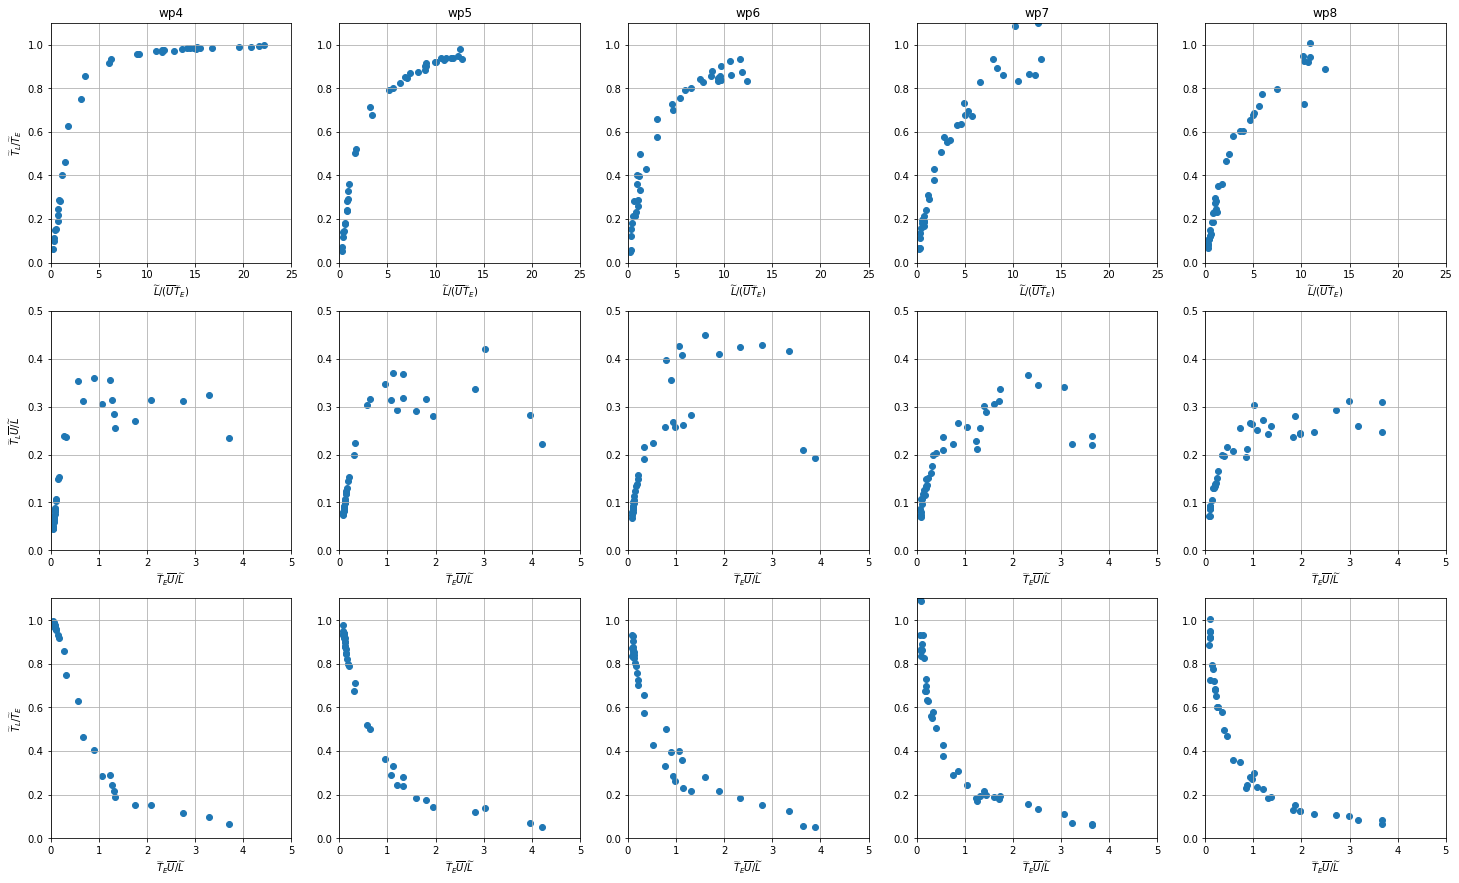

In [11]:
fig,ax = plt.subplots(3,len(ds),figsize=(5*len(ds),15))
for i,d in enumerate(ds):#,['wp4,wp5,wp6,wp7,wp8']):
    x = d['Ta']/d['E_u_avg'].sel(param='Tt')
    y = d['L_u_avg'].sel(param='Tt')/d['E_u_avg'].sel(param='Tt')
    file = sorted(glob(path+'jet*1000j'))[i]
    wp = file[-20:-19]
    ax[0,i].scatter(x,y);ax[0,i].set_title('wp'+wp)
    ax[0,i].grid();ax[0,i].set_xlabel(r'$\widetilde{L}/(\overline{U}\widetilde{T}_E)$')
    ax[0,0].set_ylabel(r'$\widetilde{T}_L/\widetilde{T}_E$')
    x = d['E_u_avg'].sel(param='Tt')/d['Ta']
    y = d['L_u_avg'].sel(param='Tt')/d['Ta']
    file = sorted(glob(path+'jet*1000j'))[i]
    wp = file[-20:-19]
    ax[1,i].scatter(x,y)
    ax[1,i].grid();ax[1,i].set_xlabel(r'$\widetilde{T}_E\overline{U}/\widetilde{L}$')
    ax[1,0].set_ylabel(r'$\widetilde{T}_L\overline{U}/\widetilde{L}$')
    x = d['E_u_avg'].sel(param='Tt')/d['Ta']
    y = d['L_u_avg'].sel(param='Tt')/d['E_u_avg'].sel(param='Tt')
    file = sorted(glob(path+'jet*1000j'))[i]
    wp = file[-20:-19]
    ax[2,i].scatter(x,y)
    ax[2,i].set_xlabel(r'$\widetilde{T}_E\overline{U}/\widetilde{L}$')
    ax[2,0].set_ylabel(r'$\widetilde{T}_L/\widetilde{T}_E$')
    ax[2,i].grid();ax[2,i].set_xlim(0.,5);ax[1,i].set_xlim(0.,5);ax[0,i].set_xlim(0.,25)
    ax[2,i].set_ylim(0.,1.1);ax[1,i].set_ylim(0.,.5);ax[0,i].set_ylim(0.,1.1)

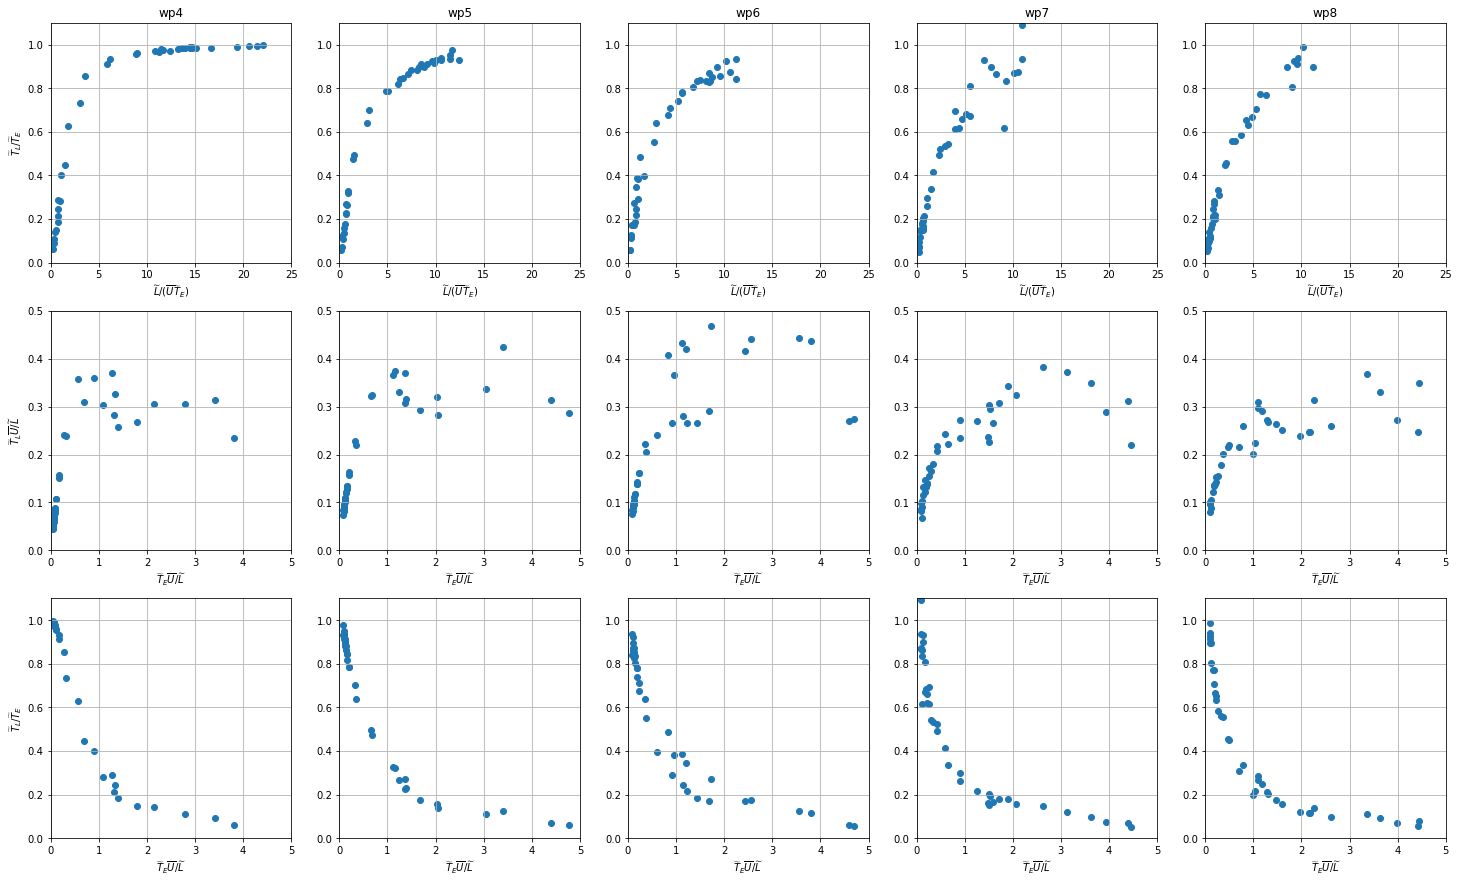

In [12]:
#Derived from v
fig,ax = plt.subplots(3,len(ds),figsize=(5*len(ds),15))
for i,d in enumerate(ds):#,['wp4,wp5,wp6,wp7,wp8']):
    x = d['Ta']/d['E_v_avg'].sel(param='Tt')
    y = d['L_v_avg'].sel(param='Tt')/d['E_v_avg'].sel(param='Tt')
    file = sorted(glob(path+'jet*1000j'))[i]
    wp = file[-20:-19]
    ax[0,i].scatter(x,y);ax[0,i].set_title('wp'+wp)
    ax[0,i].grid();ax[0,i].set_xlabel(r'$\widetilde{L}/(\overline{U}\widetilde{T}_E)$')
    ax[0,0].set_ylabel(r'$\widetilde{T}_L/\widetilde{T}_E$')
    x = d['E_v_avg'].sel(param='Tt')/d['Ta']
    y = d['L_v_avg'].sel(param='Tt')/d['Ta']
    file = sorted(glob(path+'jet*1000j'))[i]
    wp = file[-20:-19]
    ax[1,i].scatter(x,y)
    ax[1,i].grid();ax[1,i].set_xlabel(r'$\widetilde{T}_E\overline{U}/\widetilde{L}$')
    ax[1,0].set_ylabel(r'$\widetilde{T}_L\overline{U}/\widetilde{L}$')
    x = d['E_v_avg'].sel(param='Tt')/d['Ta']
    y = d['L_v_avg'].sel(param='Tt')/d['E_v_avg'].sel(param='Tt')
    file = sorted(glob(path+'jet*1000j'))[i]
    wp = file[-20:-19]
    ax[2,i].scatter(x,y)
    ax[2,i].set_xlabel(r'$\widetilde{T}_E\overline{U}/\widetilde{L}$')
    ax[2,0].set_ylabel(r'$\widetilde{T}_L/\widetilde{T}_E$')
    ax[2,i].grid();ax[2,i].set_xlim(0.,5);ax[1,i].set_xlim(0.,5);ax[0,i].set_xlim(0.,25)
    ax[2,i].set_ylim(0.,1.1);ax[1,i].set_ylim(0.,.5);ax[0,i].set_ylim(0.,1.1)

In [13]:
number = len(ds)
cmap = plt.get_cmap('YlOrBr')
colors = [cmap(i) for i in np.linspace(0, 1, number)]

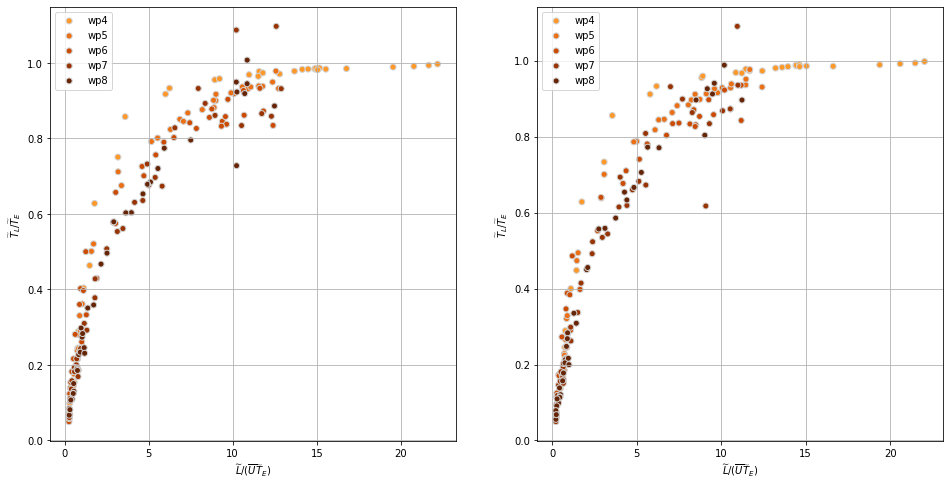

In [6]:
fig,axs = plt.subplots(1,2,figsize=(16,8))
for ax, V in zip(axs,[['E_u_avg','L_u_avg'],['E_v_avg','L_v_avg']]):
    for i,d,c in zip(range(len(ds)),ds,colors):#,['wp4,wp5,wp6,wp7,wp8']):
        x = d['Ta']/d[V[0]].sel(param='Tt')
        y = d[V[1]].sel(param='Tt')/d[V[0]].sel(param='Tt')
        file = sorted(glob(path+'jet*1000j'))[i]
        wp = file[-20:-19]
        c = np.full((y.size,4),c)
        ax.scatter(x,y,label='wp'+wp,c=c,edgecolor='lightgrey')
    ax.set_xlabel(r'$\widetilde{L}/(\overline{U}\widetilde{T}_E)$')
    ax.set_ylabel(r'$\widetilde{T}_L/\widetilde{T}_E$')
    ax.grid()
    ax.legend()

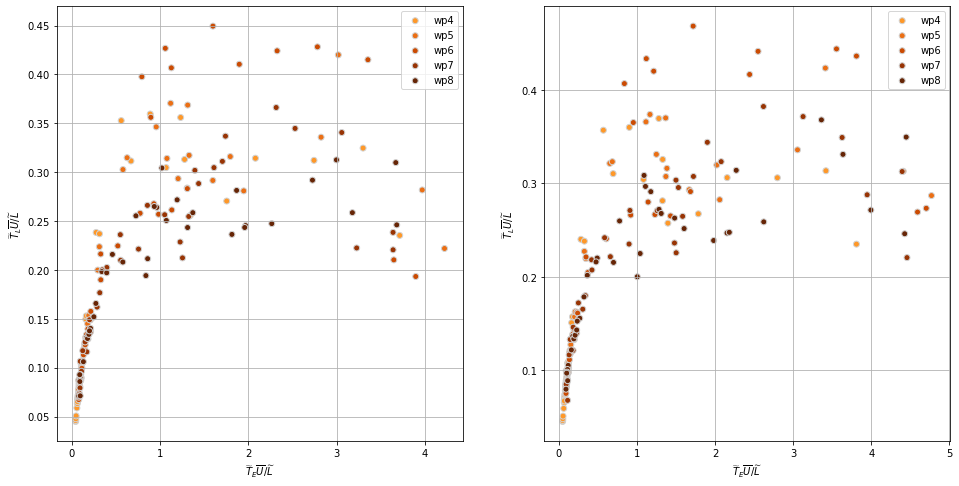

In [7]:
fig,axs = plt.subplots(1,2,figsize=(16,8))
for ax, V in zip(axs,[['E_u_avg','L_u_avg'],['E_v_avg','L_v_avg']]):
    for i,d,c in zip(range(len(ds)),ds,colors):#,['wp4,wp5,wp6,wp7,wp8']):
        x = d[V[0]].sel(param='Tt')/d['Ta']
        y = d[V[1]].sel(param='Tt')/d['Ta']
        file = sorted(glob(path+'jet*1000j'))[i]
        wp = file[-20:-19]
        c = np.full((y.size,4),c)
        ax.scatter(x,y,label='wp'+wp,c=c,edgecolor='lightgrey')
    ax.grid()
    ax.legend()
    ax.set_xlabel(r'$\widetilde{T}_E\overline{U}/\widetilde{L}$')
    ax.set_ylabel(r'$\widetilde{T}_L\overline{U}/\widetilde{L}$')

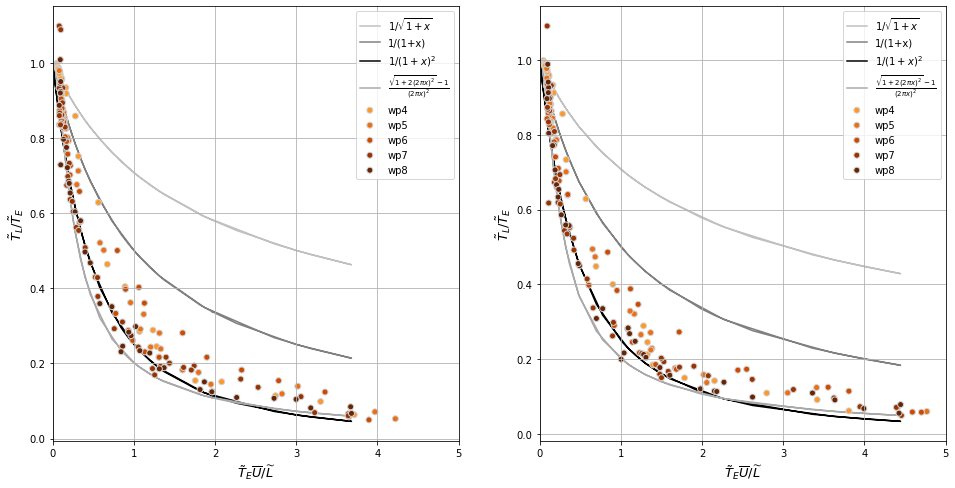

In [16]:
fig,axs = plt.subplots(1,2,figsize=(16,8))
for ax, V in zip(axs,[['E_u_avg','L_u_avg'],['E_v_avg','L_v_avg']]):
    for i,d,c in zip(range(len(ds)),ds,colors):#,['wp4,wp5,wp6,wp7,wp8']):
        x = d[V[0]].sel(param='Tt')/d['Ta']
        y = d[V[1]].sel(param='Tt')/d[V[0]].sel(param='Tt')
        file = sorted(glob(path+'jet*1000j'))[i]
        wp = file[-20:-19]
        c = np.full((y.size,4),c)
        ax.scatter(x,y,label='wp'+wp,c=c,edgecolor='lightgrey')
    ax.plot(x,1/np.sqrt(1+x),c='silver',zorder=-1,label=r'1/$\sqrt{1+x}$')
    ax.plot(x,1/(1+x),c='grey',zorder=-1,label=r'1/(1+x)')
    ax.plot(x,1/((1+x)**2),c='k',zorder=-1,label=r'1/$(1+x)^2$')
    ax.plot(x,(np.sqrt(1+2*(2*np.pi*x)**2)-1)/((2*np.pi*x)**2),c='darkgrey',zorder=-1,label=r'$\frac{\sqrt{1+2(2\pi x)^2}-1}{(2\pi x)^2}$')
#    ax.plot(x,1/(1+x**2),c='darkgrey',zorder=-1,label=r'1/$(1+x^2)$')
    ax.grid()
    ax.legend()
    ax.set_xlabel(r'$\tilde{T}_E\overline{U}/\widetilde{L}$',fontsize=fontsize)
    ax.set_ylabel(r'$\tilde{T}_L/\tilde{T}_E$',fontsize=fontsize)
    ax.set_xlim(0,5)
plt.savefig('/Users/zcaspar/codes/Figures/Synthesis/TlTe_TaTe.pdf')

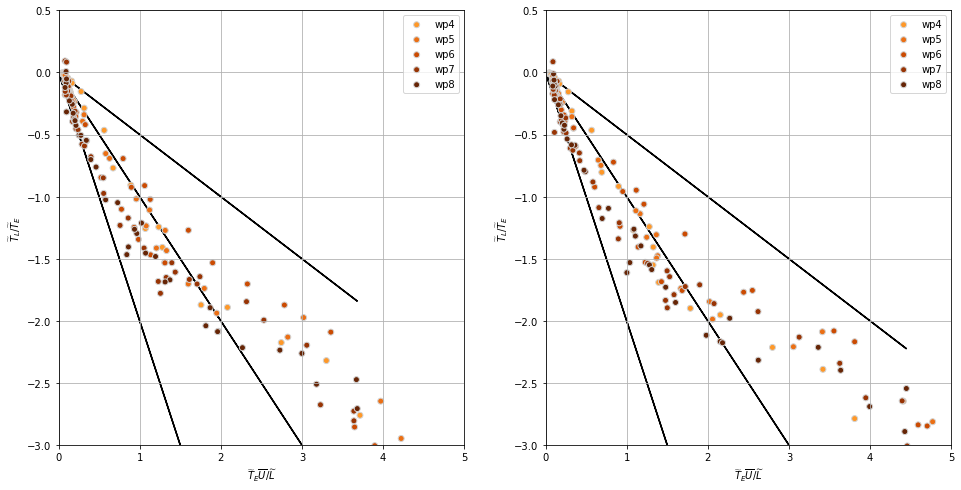

In [13]:
fig,axs = plt.subplots(1,2,figsize=(16,8))
for ax, V in zip(axs,[['E_u_avg','L_u_avg'],['E_v_avg','L_v_avg']]):
    for i,d,c in zip(range(len(ds)),ds,colors):#,['wp4,wp5,wp6,wp7,wp8']):
        x = d[V[0]].sel(param='Tt')/d['Ta']
        y = d[V[1]].sel(param='Tt')/d[V[0]].sel(param='Tt')
        file = sorted(glob(path+'jet*1000j'))[i]
        wp = file[-20:-19]
        c = np.full((y.size,4),c)
        ax.scatter(x,np.log(y),label='wp'+wp,c=c,edgecolor='lightgrey')
    ax.plot(x,-2*x,'k',zorder=-1)
    ax.plot(x,-1*x,'k',zorder=-1)
    ax.plot(x,-1/2*x,'k',zorder=-1)
#    ax.plot(x,np.log(1/np.sqrt(1+x)),c='silver',zorder=-1,label=r'1/$\sqrt{1+x}$')
#    ax.plot(x,np.log(1/(1+x)),c='grey',zorder=-1,label=r'1/(1+x)')
#    ax.plot(x,np.log(1/((1+x)**2)),c='k',zorder=-1,label=r'1/$(1+x)^2$')
    ax.grid();ax.set_ylim(-3,0.5)
    ax.legend()
    ax.set_xlabel(r'$\widetilde{T}_E\overline{U}/\widetilde{L}$')
    ax.set_ylabel(r'$\widetilde{T}_L/\widetilde{T}_E$')

    ax.set_xlim(0,5)

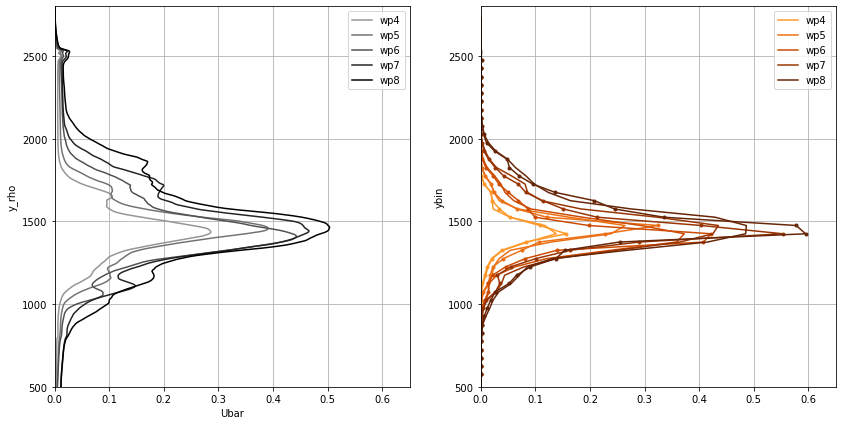

In [14]:
fig,ax = plt.subplots(1,2,figsize=(14,7))
for i,d in enumerate(ds):
    file = sorted(glob(path+'jet*1000j'))[i]
    wp = file[-20:-19]
    #d['Ubar'].reset_coords({'y_rho':d['Ubar'].y_rho.values*1e-3}).y_rho.values
    d['Ubar'].assign_coords({'y_rho':d['Ubar'].y_rho*1e-3}).plot(ax=ax[0],y='y_rho',c=colors_Ta[i],label='wp'+wp)
    np.sqrt(d['L_v'].sel(param='Xbar')**2+d['L_u'].sel(param='Xbar')**2).plot(ax=ax[1],y='ybin',c=colors[i],marker='.')
    np.sqrt(d['E_v'].sel(param='Xbar')**2+d['E_u'].sel(param='Xbar')**2).plot(ax=ax[1],y='ybin',c=colors[i],label='wp'+wp)
    ax[0].set_ylim(500,2800);ax[0].grid();ax[0].set_xlim(0,0.65);ax[0].set_title('')
    ax[1].set_ylim(500,2800);ax[1].grid();ax[1].set_xlim(0,0.65);ax[1].set_title('')
    ax[0].legend();ax[1].legend()

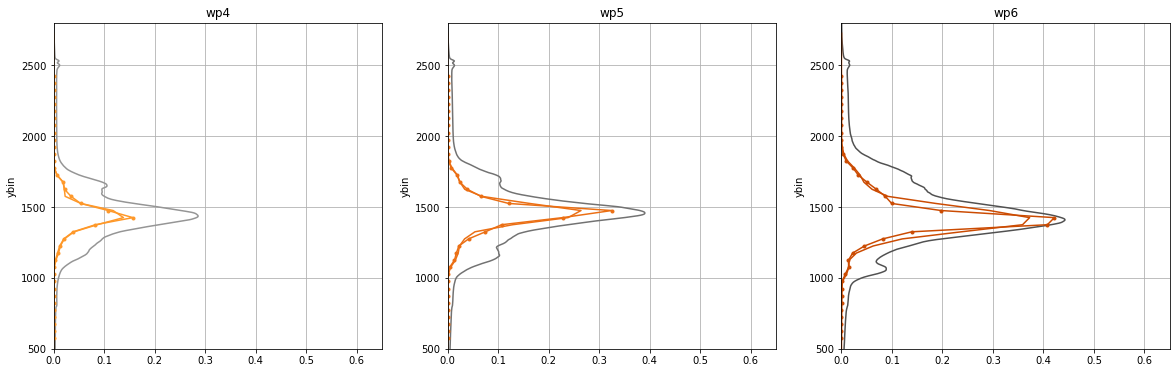

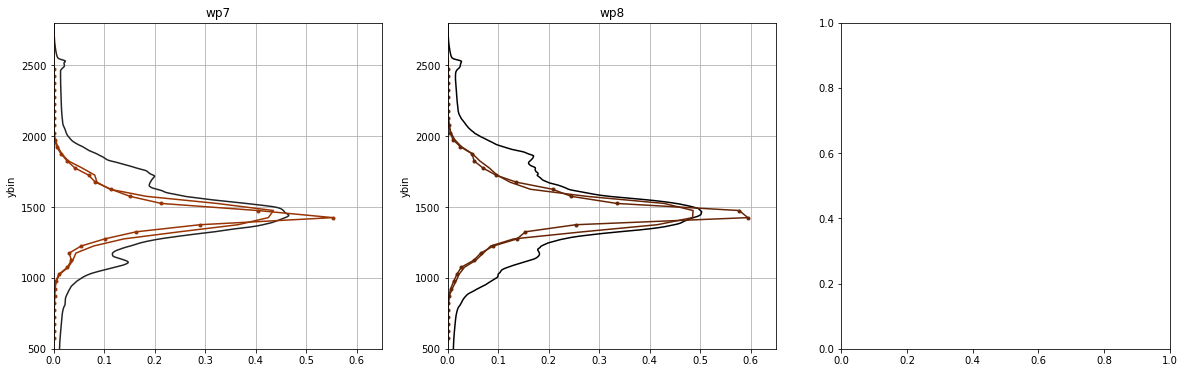

In [15]:
fig,ax = plt.subplots(1,3,figsize=(20,6))
for i,d in enumerate(ds[:3]):
    file = sorted(glob(path+'jet*1000j'))[i]
    wp = file[-20:-19]
    #d['Ubar'].reset_coords({'y_rho':d['Ubar'].y_rho.values*1e-3}).y_rho.values
    d['Ubar'].assign_coords({'y_rho':d['Ubar'].y_rho*1e-3}).plot(ax=ax[i],y='y_rho',c=colors_Ta[i],label='wp'+wp)
    np.sqrt(d['L_v'].sel(param='Xbar')**2+d['L_u'].sel(param='Xbar')**2).plot(ax=ax[i],y='ybin',c=colors[i],marker='.')
    np.sqrt(d['E_v'].sel(param='Xbar')**2+d['E_u'].sel(param='Xbar')**2).plot(ax=ax[i],y='ybin',c=colors[i])
    ax[i].set_ylim(500,2800);ax[i].grid();ax[i].set_xlim(0,0.65);ax[i].set_title('wp'+wp)
fig,ax = plt.subplots(1,3,figsize=(20,6))
for i,d in enumerate(ds[3:]):
    file = sorted(glob(path+'jet*1000j'))[i+3]
    wp = file[-20:-19]
    #d['Ubar'].reset_coords({'y_rho':d['Ubar'].y_rho.values*1e-3}).y_rho.values
    d['Ubar'].assign_coords({'y_rho':d['Ubar'].y_rho*1e-3}).plot(ax=ax[i],y='y_rho',c=colors_Ta[i+3],label='wp'+wp)
    np.sqrt(d['L_v'].sel(param='Xbar')**2+d['L_u'].sel(param='Xbar')**2).plot(ax=ax[i],y='ybin',c=colors[i+3],marker='.')
    np.sqrt(d['E_v'].sel(param='Xbar')**2+d['E_u'].sel(param='Xbar')**2).plot(ax=ax[i],y='ybin',c=colors[i+3])
    ax[i].set_ylim(500,2800);ax[i].grid();ax[i].set_xlim(0,0.65);ax[i].set_title('wp'+wp)
